# Analyzing Population Trends in Swedish Regions

This script uses the SCB API to fetch and analyze population data for different age groups in various regions of Sweden from 2000 to 2022. The data is processed, cleaned, and visualized using Pandas, NumPy, Seaborn, and Matplotlib. The resulting population trends are then presented in a series of plots, highlighting both the national and regional perspectives.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyscbwrapper import SCB
from scipy.stats import norm

C:\Users\DEKI_\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Initialize SCB object for Swedish data
scb = SCB('sv')
scb.info()

[{'id': 'AA', 'type': 'l', 'text': 'Ämnesövergripande statistik'},
 {'id': 'AM', 'type': 'l', 'text': 'Arbetsmarknad'},
 {'id': 'BE', 'type': 'l', 'text': 'Befolkning'},
 {'id': 'BO', 'type': 'l', 'text': 'Boende, byggande och bebyggelse'},
 {'id': 'EN', 'type': 'l', 'text': 'Energi'},
 {'id': 'FM', 'type': 'l', 'text': 'Finansmarknad'},
 {'id': 'HA', 'type': 'l', 'text': 'Handel med varor och tjänster'},
 {'id': 'HE', 'type': 'l', 'text': 'Hushållens ekonomi'},
 {'id': 'HS', 'type': 'l', 'text': 'Hälso- och sjukvård'},
 {'id': 'JO', 'type': 'l', 'text': 'Jord- och skogsbruk, fiske'},
 {'id': 'KU', 'type': 'l', 'text': 'Kultur och fritid'},
 {'id': 'LE', 'type': 'l', 'text': 'Levnadsförhållanden'},
 {'id': 'ME', 'type': 'l', 'text': 'Demokrati'},
 {'id': 'MI', 'type': 'l', 'text': 'Miljö'},
 {'id': 'NR', 'type': 'l', 'text': 'Nationalräkenskaper'},
 {'id': 'NV', 'type': 'l', 'text': 'Näringsverksamhet'},
 {'id': 'OE', 'type': 'l', 'text': 'Offentlig ekonomi'},
 {'id': 'PR', 'type': 'l'

In [3]:
# Navigate to the desired data level using codes
scb.go_down('BE')
scb.info()

[{'id': 'BE0701', 'type': 'l', 'text': 'Demografisk analys (Demografi)'},
 {'id': 'BE0101', 'type': 'l', 'text': 'Befolkningsstatistik'},
 {'id': 'BE0205',
  'type': 'l',
  'text': 'Tidigare folk- och bostadsräkningar 1960-1990 (FoB)'},
 {'id': 'BE0001', 'type': 'l', 'text': 'Namnstatistik'},
 {'id': 'BE0401', 'type': 'l', 'text': 'Befolkningsframskrivningar'}]

In [4]:
scb.go_down('BE0101')
scb.info()

[{'id': 'BE0101A', 'type': 'l', 'text': 'Folkmängd'},
 {'id': 'BE0101G', 'type': 'l', 'text': 'Befolkningsförändringar'},
 {'id': 'BE0101H', 'type': 'l', 'text': 'Födda'},
 {'id': 'BE0101I', 'type': 'l', 'text': 'Döda'},
 {'id': 'BE0101J', 'type': 'l', 'text': 'Flyttningar - inrikes och utrikes'},
 {'id': 'BE0101D', 'type': 'l', 'text': 'Medelfolkmängd'},
 {'id': 'BE0101E', 'type': 'l', 'text': 'Utrikes födda'},
 {'id': 'BE0101F', 'type': 'l', 'text': 'Utländska medborgare'},
 {'id': 'BE0101Q', 'type': 'l', 'text': 'Utländsk/svensk bakgrund'},
 {'id': 'BE0101N', 'type': 'l', 'text': 'Medborgarskapsbyten'},
 {'id': 'BE0101B', 'type': 'l', 'text': 'Medelålder'},
 {'id': 'BE0101L', 'type': 'l', 'text': 'Gifta, Skilda och Änka/änkling'},
 {'id': 'BE0101O', 'type': 'l', 'text': 'Partnerskap'},
 {'id': 'BE0101S', 'type': 'l', 'text': 'Hushåll'},
 {'id': 'BE0101K', 'type': 'l', 'text': 'Adopterade'},
 {'id': 'BE0101M',
  'type': 'l',
  'text': 'Cirkulär migration – Äldre tabeller som inte län

In [5]:
scb.go_down('BE0101A')
scb.info()

[{'id': 'BefolkningNy',
  'type': 't',
  'text': 'Folkmängden efter region, civilstånd, ålder och kön. År 1968 - 2022',
  'updated': '2023-02-22T08:00:00'},
 {'id': 'FolkmangdNov',
  'type': 't',
  'text': 'Folkmängden den 1 november efter region, ålder och kön. År 2002 - 2022',
  'updated': '2022-12-09T08:00:00'},
 {'id': 'FolkmangdDistrikt',
  'type': 't',
  'text': 'Folkmängden per distrikt, landskap, landsdel eller riket efter kön. År 2015 - 2022',
  'updated': '2023-03-22T08:00:00'},
 {'id': 'BefolkManad',
  'type': 't',
  'text': 'Folkmängden per månad efter region, ålder och kön. År 2000M01 - 2023M09',
  'updated': '2023-11-10T08:00:00'},
 {'id': 'BefolkningR1860N',
  'type': 't',
  'text': 'Folkmängden efter ålder och kön . År 1860 - 2022',
  'updated': '2023-02-22T08:00:00'}]

In [6]:
scb.go_down('BefolkManad')
scb.info()

{'title': 'Folkmängden per månad efter region, ålder, kön, tabellinnehåll och månad',
 'variables': [{'code': 'Region',
   'text': 'region',
   'values': ['00',
    '01',
    '0114',
    '0115',
    '0117',
    '0120',
    '0123',
    '0125',
    '0126',
    '0127',
    '0128',
    '0136',
    '0138',
    '0139',
    '0140',
    '0160',
    '0162',
    '0163',
    '0180',
    '0181',
    '0182',
    '0183',
    '0184',
    '0186',
    '0187',
    '0188',
    '0191',
    '0192',
    '03',
    '0305',
    '0319',
    '0330',
    '0331',
    '0360',
    '0380',
    '0381',
    '0382',
    '04',
    '0428',
    '0461',
    '0480',
    '0481',
    '0482',
    '0483',
    '0484',
    '0486',
    '0488',
    '05',
    '0509',
    '0512',
    '0513',
    '0560',
    '0561',
    '0562',
    '0563',
    '0580',
    '0581',
    '0582',
    '0583',
    '0584',
    '0586',
    '06',
    '0604',
    '0617',
    '0642',
    '0643',
    '0662',
    '0665',
    '0680',
    '0682',
    '0683',
    '0684

In [7]:
# Get information about available variables at the current level
scb.get_variables()

{'region': ['Riket',
  'Stockholms län',
  'Upplands Väsby',
  'Vallentuna',
  'Österåker',
  'Värmdö',
  'Järfälla',
  'Ekerö',
  'Huddinge',
  'Botkyrka',
  'Salem',
  'Haninge',
  'Tyresö',
  'Upplands-Bro',
  'Nykvarn',
  'Täby',
  'Danderyd',
  'Sollentuna',
  'Stockholm',
  'Södertälje',
  'Nacka',
  'Sundbyberg',
  'Solna',
  'Lidingö',
  'Vaxholm',
  'Norrtälje',
  'Sigtuna',
  'Nynäshamn',
  'Uppsala län',
  'Håbo',
  'Älvkarleby',
  'Knivsta',
  'Heby',
  'Tierp',
  'Uppsala',
  'Enköping',
  'Östhammar',
  'Södermanlands län',
  'Vingåker',
  'Gnesta',
  'Nyköping',
  'Oxelösund',
  'Flen',
  'Katrineholm',
  'Eskilstuna',
  'Strängnäs',
  'Trosa',
  'Östergötlands län',
  'Ödeshög',
  'Ydre',
  'Kinda',
  'Boxholm',
  'Åtvidaberg',
  'Finspång',
  'Valdemarsvik',
  'Linköping',
  'Norrköping',
  'Söderköping',
  'Motala',
  'Vadstena',
  'Mjölby',
  'Jönköpings län',
  'Aneby',
  'Gnosjö',
  'Mullsjö',
  'Habo',
  'Gislaved',
  'Vaggeryd',
  'Jönköping',
  'Nässjö',
  'Värn

In [8]:
# Define age groups and years for the query
age = [str(x) for x in range(20,75)]
years = [str(x) for x in range(2000, 2022)]

In [9]:
# Set the query parameters for the SCB API
scb.set_query(region=['Riket', 'Stockholm', 'Göteborg', 'Malmö'],
              ålder=age,
              år=years)


In [10]:
# Display the current query
scb.get_query()

{'query': [{'code': 'Region',
   'selection': {'filter': 'item', 'values': ['00', '0180', '1280', '1480']}},
  {'code': 'Alder', 'selection': {'filter': 'item', 'values': []}}],
 'response': {'format': 'json'}}

In [11]:
# Retrieve data from the SCB API
scb_data = scb.get_data()

In [12]:
# Extract the 'data' key from the response
scb_uttag = scb_data['data']

In [13]:
scb_uttag

[{'key': ['00', '2000M01'], 'values': ['8860180']},
 {'key': ['00', '2000M02'], 'values': ['8860547']},
 {'key': ['00', '2000M03'], 'values': ['8862037']},
 {'key': ['00', '2000M04'], 'values': ['8863675']},
 {'key': ['00', '2000M05'], 'values': ['8865918']},
 {'key': ['00', '2000M06'], 'values': ['8869255']},
 {'key': ['00', '2000M07'], 'values': ['8873307']},
 {'key': ['00', '2000M08'], 'values': ['8876611']},
 {'key': ['00', '2000M09'], 'values': ['8878828']},
 {'key': ['00', '2000M10'], 'values': ['8880532']},
 {'key': ['00', '2000M11'], 'values': ['8882007']},
 {'key': ['00', '2000M12'], 'values': ['8882792']},
 {'key': ['00', '2001M01'], 'values': ['8884193']},
 {'key': ['00', '2001M02'], 'values': ['8885452']},
 {'key': ['00', '2001M03'], 'values': ['8887136']},
 {'key': ['00', '2001M04'], 'values': ['8888952']},
 {'key': ['00', '2001M05'], 'values': ['8891640']},
 {'key': ['00', '2001M06'], 'values': ['8894674']},
 {'key': ['00', '2001M07'], 'values': ['8898554']},
 {'key': ['0

In [14]:
# Create a DataFrame from the extracted data
df = pd.DataFrame(scb_uttag)
df

,key,values
0,"[00, 2000M01]",[8860180]
1,"[00, 2000M02]",[8860547]
2,"[00, 2000M03]",[8862037]
3,"[00, 2000M04]",[8863675]
4,"[00, 2000M05]",[8865918]
...,...,...
1135,"[1480, 2023M05]",[600559]
1136,"[1480, 2023M06]",[601130]
1137,"[1480, 2023M07]",[601350]
1138,"[1480, 2023M08]",[603325]


In [15]:
# Create new DataFrames from the 'key' and 'values' columns
split_df = pd.DataFrame(df['key'].tolist(), columns=['Region Code','Year'])
split_df2 = pd.DataFrame(df['values'].tolist(), columns=['Population'])


In [16]:
# Concatenate the new DataFrames with the original DataFrame
df = pd.concat([df, split_df, split_df2], axis=1)
# display df
df.head()

,key,values,Region Code,Year,Population
0,"[00, 2000M01]",[8860180],00,2000M01,8860180
1,"[00, 2000M02]",[8860547],00,2000M02,8860547
2,"[00, 2000M03]",[8862037],00,2000M03,8862037
3,"[00, 2000M04]",[8863675],00,2000M04,8863675
4,"[00, 2000M05]",[8865918],00,2000M05,8865918


In [17]:
# Drop unnecessary columns
df.drop(columns=['key', 'values'], inplace=True)
df.head()

,Region Code,Year,Population
0,00,2000M01,8860180
1,00,2000M02,8860547
2,00,2000M03,8862037
3,00,2000M04,8863675
4,00,2000M05,8865918


In [18]:
# Rename the 'Year' column to 'Date'
df.rename(columns={'Year':'Date'},inplace=True)
df.head()

,Region Code,Date,Population
0,00,2000M01,8860180
1,00,2000M02,8860547
2,00,2000M03,8862037
3,00,2000M04,8863675
4,00,2000M05,8865918


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region Code  1140 non-null   object
 1   Date         1140 non-null   object
 2   Population   1140 non-null   object
dtypes: object(3)
memory usage: 26.8+ KB


In [20]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'].str.extract(r'(\d{4}M\d{2})')[0], format='%YM%m')

In [21]:
df

,Region Code,Date,Population
0,00,2000-01-01,8860180
1,00,2000-02-01,8860547
2,00,2000-03-01,8862037
3,00,2000-04-01,8863675
4,00,2000-05-01,8865918
...,...,...,...
1135,1480,2023-05-01,600559
1136,1480,2023-06-01,601130
1137,1480,2023-07-01,601350
1138,1480,2023-08-01,603325


In [22]:
# Extract unique region codes
region = ['Riket','Stockholm','Malmö', 'Göteborg']

In [23]:
# Extract unique region codes
region_code = df['Region Code'].unique()
region_code

array(['00', '0180', '1280', '1480'], dtype=object)

In [24]:
# Define conditions for each region
conditions = [
    (df['Region Code'] == region_code[0]),
    (df['Region Code'] == region_code[1]),
    (df['Region Code'] == region_code[2]),
    (df['Region Code'] == region_code[3])
]

# Create a new 'Region' column based on conditions
df['Region'] = np.select(conditions, region)

In [25]:
# Drop the 'Region Code' column
df.drop(columns='Region Code', inplace=True)
df.head()

,Date,Population,Region
0,2000-01-01,8860180,Riket
1,2000-02-01,8860547,Riket
2,2000-03-01,8862037,Riket
3,2000-04-01,8863675,Riket
4,2000-05-01,8865918,Riket


In [26]:
# Set 'Date' as the index and drop 'Date' column
df.set_index(df['Date'],inplace=True)
df.drop(columns='Date', inplace=True)

In [27]:
df.head()

,Population,Region
Date,,
2000-01-01,8860180,Riket
2000-02-01,8860547,Riket
2000-03-01,8862037,Riket
2000-04-01,8863675,Riket
2000-05-01,8865918,Riket


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2000-01-01 to 2023-09-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  1140 non-null   object
 1   Region      1140 non-null   object
dtypes: object(2)
memory usage: 26.7+ KB


In [29]:
# Convert 'Population' to int
df['Population'] = pd.to_numeric(df['Population'], errors='coerce').astype('Int64')

# Convert 'Region' to string
df['Region'] = df['Region'].astype(str)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2000-01-01 to 2023-09-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  1140 non-null   Int64 
 1   Region      1140 non-null   object
dtypes: Int64(1), object(1)
memory usage: 27.8+ KB


In [31]:
# Convert 'Date' to datetime format if it's not already
df['Date'] = pd.to_datetime(df.index)

# Filter the DataFrame to include only January 1st for each year
january_1st = df[df['Date'].dt.month == 1 & (df['Date'].dt.day == 1)]
january_1st

,Population,Region,Date
Date,,,
2000-01-01,8860180,Riket,2000-01-01
2001-01-01,8884193,Riket,2001-01-01
2002-01-01,8910910,Riket,2002-01-01
2003-01-01,8941960,Riket,2003-01-01
2004-01-01,8977418,Riket,2004-01-01
...,...,...,...
2019-01-01,572558,Göteborg,2019-01-01
2020-01-01,579695,Göteborg,2020-01-01
2021-01-01,583072,Göteborg,2021-01-01


In [32]:
# Create a pivoted DataFrame
df_pivoted = df.pivot(columns='Region', values='Population')


In [33]:
df_pivoted

Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2000-01-01,462756,257609,8860180,743963
2000-02-01,463198,257635,8860547,744710
2000-03-01,463454,257831,8862037,745583
2000-04-01,463676,257898,8863675,745947
2000-05-01,463747,258071,8865918,746360
...,...,...,...,...
2023-05-01,600559,359518,10540886,987266
2023-06-01,601130,359929,10545310,987661
2023-07-01,601350,360249,10548336,987690


In [34]:
# Convert the 'Date' column to datetime if it's not already
df_pivoted.index = pd.to_datetime(df_pivoted.index)

# Filter the DataFrame to include only January 1st for each year
first_january_each_year = df_pivoted[df_pivoted.index.month == 1 & (df_pivoted.index.day == 1)]

# Display the result
first_january_each_year

Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2000-01-01,462756,257609,8860180,743963
2001-01-01,467418,259848,8884193,750832
2002-01-01,471852,262732,8910910,755529
2003-01-01,475269,265611,8941960,758512
2004-01-01,478519,267515,8977418,762294
2005-01-01,481461,269320,9013109,765431
2006-01-01,485779,271791,9053340,772100
2007-01-01,490204,276795,9117712,784340
2008-01-01,494246,281153,9187630,796671


In [35]:
df = df_pivoted.copy()

In [36]:
df.head()

Region,Göteborg,Malmö,Riket,Stockholm
Date,,,,
2000-01-01,462756,257609,8860180,743963
2000-02-01,463198,257635,8860547,744710
2000-03-01,463454,257831,8862037,745583
2000-04-01,463676,257898,8863675,745947
2000-05-01,463747,258071,8865918,746360


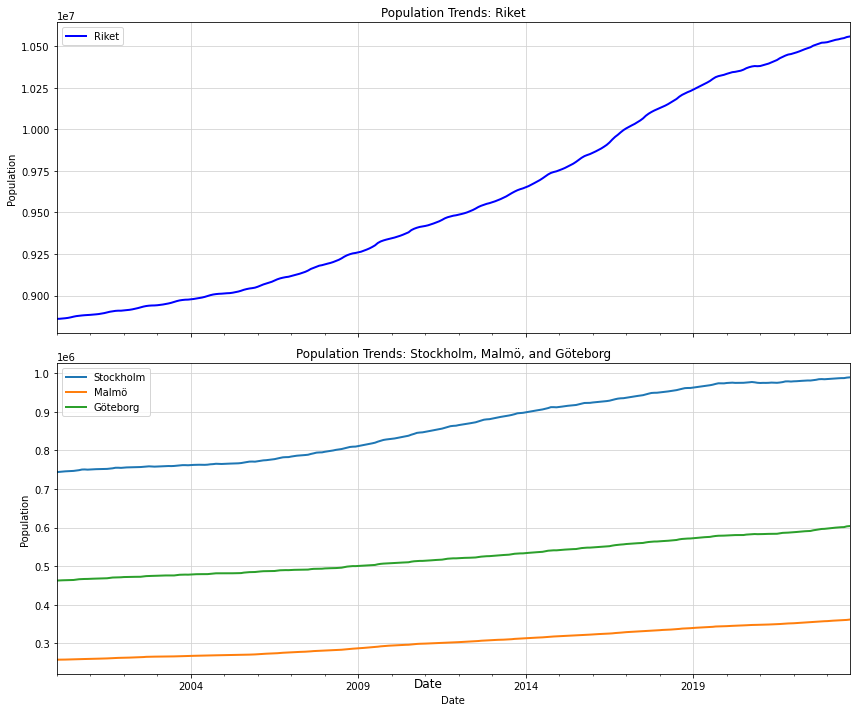

In [37]:
# Create subplots with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot Riket in the first subplot
df['Riket'].plot(ax=axes[0], linewidth=2, label='Riket', color='blue')
axes[0].set_title('Population Trends: Riket')
axes[0].set_ylabel('Population')
axes[0].legend()

# Plot Stockholm, Malmö, and Göteborg in the second subplot with a different y-axis
df[['Stockholm', 'Malmö', 'Göteborg']].plot(ax=axes[1], linewidth=2)
axes[1].set_title('Population Trends: Stockholm, Malmö, and Göteborg')
axes[1].set_ylabel('Population')
axes[1].legend(['Stockholm', 'Malmö', 'Göteborg'])

# Add common x-axis label
fig.text(0.5, 0.04, 'Date', ha='center', fontsize=12)

# Remove background color and set light grey grids
for ax in axes:
    ax.set_facecolor('none')
    ax.grid(color='lightgrey')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
